In [62]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.feature_selection import SelectFromModel
import plotly.express as px

pd.options.display.max_columns = 999

X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.  
X2: Gender (1 = male; 2 = female).  
X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).  
X4: Marital status (1 = married; 2 = single; 3 = others).  
X5: Age (year).  
X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005.  
The measurement scale for the repayment status is: -2 = No consumption (there is nothing due AND the person is not using revolving credit); -1 = Paid in full; 0 = The use of revolving credit; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.  
X12-X17: Amount of bill statement (NT dollar).  
X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.   
X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.  

In [63]:
data = pd.read_excel("C:\\University files\\semester 3\\STAT 4188\\Final Project\\default of credit card clients.xls")

In [64]:
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [65]:
data.columns = data.iloc[0]
data = data[1:]

In [66]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [67]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [68]:
for col in data:
    print(f'{col}: {data[col].unique()}')

ID: [1 2 3 ... 29998 29999 30000]
LIMIT_BAL: [20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
SEX: [2 1]
EDUCATION: [2 1 3 5 4 6 0]
MARRIAGE: [1 2 3 0]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
PAY_0: [2 -1 0 -2 1 3 4 8 7 5 6]
PAY_2: [2 0 -1 -2 3 5 7 4 1 6 8]
PAY_3: [-1 0 2 -2 3 4 6 7 1 5 8]
PAY_4: [-1 0 -2 2 3 4 5 7 6 1 8]
PAY_5: [-2 0 -1 2 3 5

In [69]:
months = ['september', 'august', 'july', 'june', 'may', 'april']
index = 0
cols_repayment = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
cols_bill = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
cols_payment = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

for repayment, bill, payment in zip(cols_repayment, cols_bill, cols_payment):
    data.rename(columns={repayment: 'months_delayed_' + months[index]}, inplace=True)
    data.rename(columns={bill: 'money_owed_' + months[index]}, inplace=True)
    data.rename(columns={payment: 'money_paid_' + months[index]}, inplace=True)
    index += 1

In [70]:
data.drop(columns='ID', axis=0, inplace=True)

In [71]:
delay_cols = ['months_delayed_september', 
              'months_delayed_august',
              'months_delayed_july', 
              'months_delayed_june',
              'months_delayed_may',
              'months_delayed_april']

data.rename(columns={'default payment next month' : 'default'}, inplace=True)
data['SEX'] = data['SEX'].map(lambda x: 0 if x == 2 else x)
data['EDUCATION'] = data['EDUCATION'].map({1:'graduate school', 2:'university', 3:'high school', 4:'others'})
data['MARRIAGE'] = data['MARRIAGE'].map({1:'married', 2:'single', 3:'others'})

'''for col in delay_cols:
    data[col] = data[col].map({-2: 'No consumption', -1: "Paid in full", 0: "The use of revolving credit", 
                               1: "delay for one month", 2: "delay for two months", 3: "delay for three months", 
                               4: "delay for four month", 5: "delay for five months", 6: "delay for six months",
                               7: "delay for seven months", 8: "delay for eight months", 9: "delay for nine months and above"})
                               '''

'for col in delay_cols:\n    data[col] = data[col].map({-2: \'No consumption\', -1: "Paid in full", 0: "The use of revolving credit", \n                               1: "delay for one month", 2: "delay for two months", 3: "delay for three months", \n                               4: "delay for four month", 5: "delay for five months", 6: "delay for six months",\n                               7: "delay for seven months", 8: "delay for eight months", 9: "delay for nine months and above"})\n                               '

In [72]:
for col in data:
    print(f'{col}: {data[col].unique()}')

LIMIT_BAL: [20000 120000 90000 50000 500000 100000 140000 200000 260000 630000 70000
 250000 320000 360000 180000 130000 450000 60000 230000 160000 280000
 10000 40000 210000 150000 380000 310000 400000 80000 290000 340000 300000
 30000 240000 470000 480000 350000 330000 110000 420000 170000 370000
 270000 220000 190000 510000 460000 440000 410000 490000 390000 580000
 600000 620000 610000 700000 670000 680000 430000 550000 540000 1000000
 530000 710000 560000 520000 750000 640000 16000 570000 590000 660000
 720000 327680 740000 800000 760000 690000 650000 780000 730000]
SEX: [0 1]
EDUCATION: ['university' 'graduate school' 'high school' nan 'others']
MARRIAGE: ['married' 'single' 'others' nan]
AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 63 36 52 48 55 60 50 75 61 73 59 21 67 66 62 70
 72 64 65 71 69 68 79 74]
months_delayed_september: [2 -1 0 -2 1 3 4 8 7 5 6]
months_delayed_august: [2 0 -1 -2 3 5 7 4 1 6 8]
months_delayed_jul

In [73]:
for col in data.iloc[:, 5:]:
    print(f'{col}: {(data[col] == 0).sum()}\n')

months_delayed_september: 14737

months_delayed_august: 15730

months_delayed_july: 15764

months_delayed_june: 16455

months_delayed_may: 16947

months_delayed_april: 16286

money_owed_september: 2008

money_owed_august: 2506

money_owed_july: 2870

money_owed_june: 3195

money_owed_may: 3506

money_owed_april: 4020

money_paid_september: 5249

money_paid_august: 5396

money_paid_july: 5968

money_paid_june: 6408

money_paid_may: 6703

money_paid_april: 7173

default: 23364



In [74]:
(data['MARRIAGE']).isna().value_counts()

MARRIAGE
False    29946
True        54
Name: count, dtype: int64

In [75]:
(data['EDUCATION']).isna().value_counts()

EDUCATION
False    29655
True       345
Name: count, dtype: int64

In [76]:
simple_imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(simple_imputer.fit_transform(data), columns=data.columns)

In [77]:
data.isna().sum()

0
LIMIT_BAL                   0
SEX                         0
EDUCATION                   0
MARRIAGE                    0
AGE                         0
months_delayed_september    0
months_delayed_august       0
months_delayed_july         0
months_delayed_june         0
months_delayed_may          0
months_delayed_april        0
money_owed_september        0
money_owed_august           0
money_owed_july             0
money_owed_june             0
money_owed_may              0
money_owed_april            0
money_paid_september        0
money_paid_august           0
money_paid_july             0
money_paid_june             0
money_paid_may              0
money_paid_april            0
default                     0
dtype: int64

In [78]:
data.dtypes

0
LIMIT_BAL                   object
SEX                         object
EDUCATION                   object
MARRIAGE                    object
AGE                         object
months_delayed_september    object
months_delayed_august       object
months_delayed_july         object
months_delayed_june         object
months_delayed_may          object
months_delayed_april        object
money_owed_september        object
money_owed_august           object
money_owed_july             object
money_owed_june             object
money_owed_may              object
money_owed_april            object
money_paid_september        object
money_paid_august           object
money_paid_july             object
money_paid_june             object
money_paid_may              object
money_paid_april            object
default                     object
dtype: object

In [79]:
cols_to_int = ['SEX', 'LIMIT_BAL', 'AGE', 'months_delayed_september', 'months_delayed_august',
       'months_delayed_july', 'months_delayed_june', 'months_delayed_may',
       'months_delayed_april', 'money_owed_september', 'money_owed_august',
       'money_owed_july', 'money_owed_june', 'money_owed_may',
       'money_owed_april', 'money_paid_september', 'money_paid_august',
       'money_paid_july', 'money_paid_june', 'money_paid_may',
       'money_paid_april', 'default']

for col in cols_to_int:
    data[col] = data[col].astype('int64')

In [80]:
data.dtypes

0
LIMIT_BAL                    int64
SEX                          int64
EDUCATION                   object
MARRIAGE                    object
AGE                          int64
months_delayed_september     int64
months_delayed_august        int64
months_delayed_july          int64
months_delayed_june          int64
months_delayed_may           int64
months_delayed_april         int64
money_owed_september         int64
money_owed_august            int64
money_owed_july              int64
money_owed_june              int64
money_owed_may               int64
money_owed_april             int64
money_paid_september         int64
money_paid_august            int64
money_paid_july              int64
money_paid_june              int64
money_paid_may               int64
money_paid_april             int64
default                      int64
dtype: object

In [81]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
0,,,,,,,,
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,0.396267,0.489129,0.0,0.00,0.0,1.00,1.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
months_delayed_september,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
months_delayed_august,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
months_delayed_july,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
months_delayed_june,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0
months_delayed_may,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0
months_delayed_april,30000.0,-0.291100,1.149988,-2.0,-1.00,0.0,0.00,8.0


In [82]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,months_delayed_september,months_delayed_august,months_delayed_july,months_delayed_june,months_delayed_may,months_delayed_april,money_owed_september,money_owed_august,money_owed_july,money_owed_june,money_owed_may,money_owed_april,money_paid_september,money_paid_august,money_paid_july,money_paid_june,money_paid_may,money_paid_april,default
0,20000,0,university,married,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,0,university,single,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,university,single,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,university,married,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,university,married,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


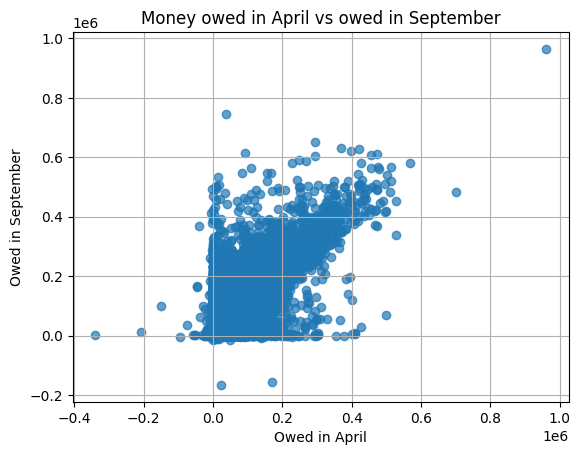

In [83]:
plt.scatter(data['money_owed_april'], data['money_owed_september'], alpha=0.7)
plt.title('Money owed in April vs owed in September')
plt.xlabel('Owed in April')
plt.ylabel('Owed in September')
plt.grid(True)
plt.show()

The more money owed in the beginning, the more owed at the end

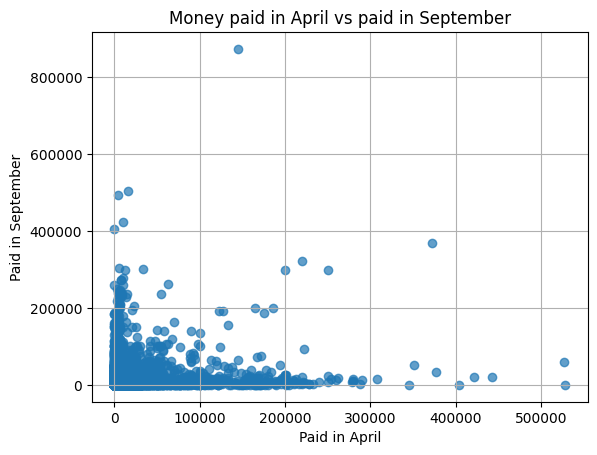

In [84]:
plt.scatter(data['money_paid_april'], data['money_paid_september'], alpha=0.7)
plt.title('Money paid in April vs paid in September')
plt.xlabel('Paid in April')
plt.ylabel('Paid in September')
plt.grid(True)
plt.show()

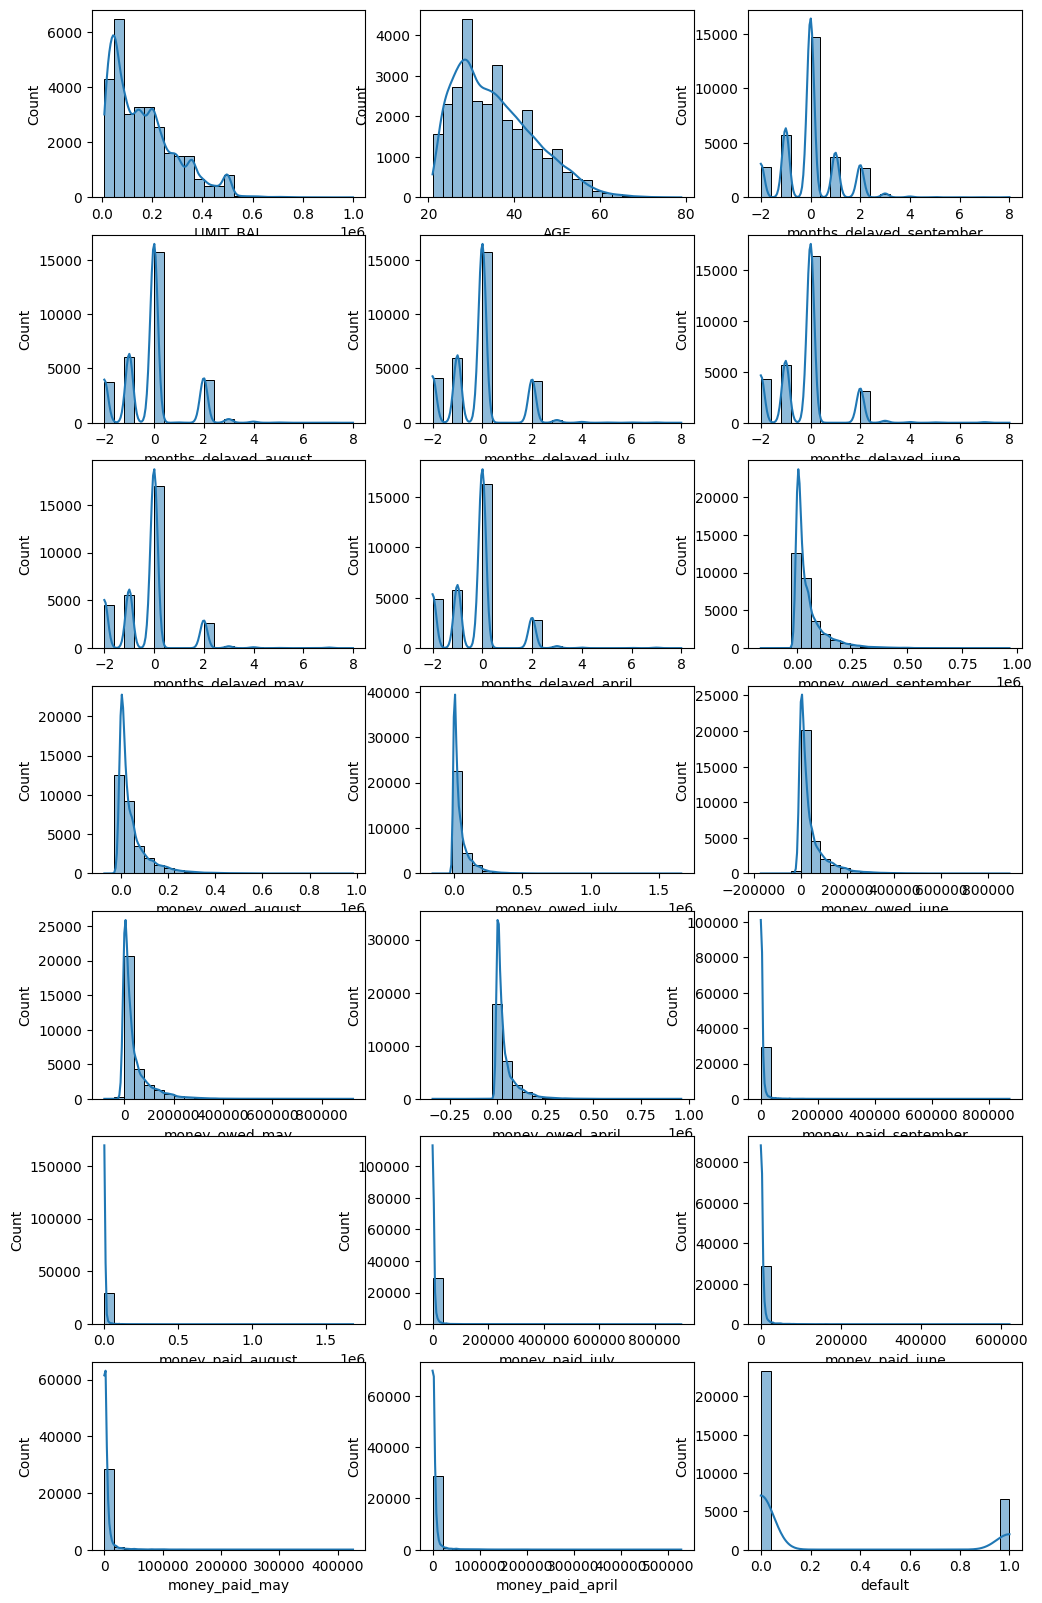

In [85]:
fig, ax = plt.subplots(7, 3, figsize=(12, 20))
index1 = 0
index2 = 0

for col in cols_to_int[1:]:
    sns.histplot(data[col], bins=25, ax=ax[index1][index2], kde=True)
    index2 += 1

    if index2 == 3:
        index2 = 0
        index1 += 1

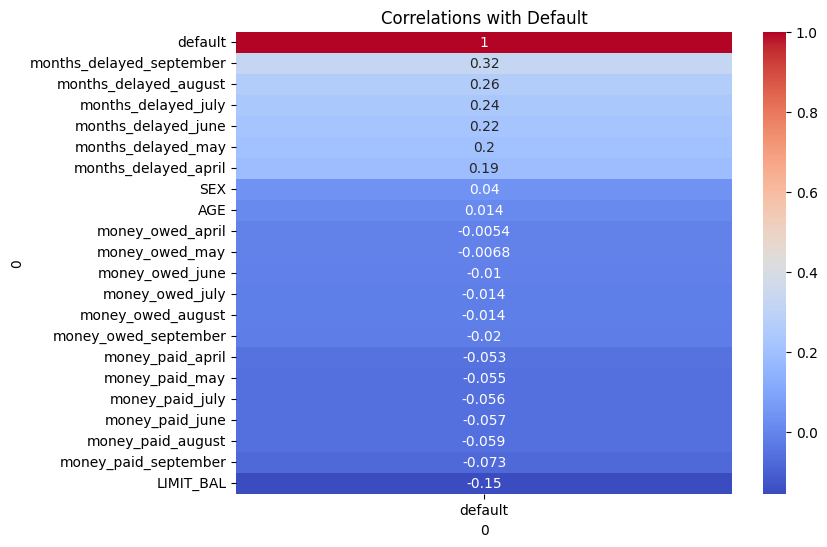

In [86]:
correlation_matrix = data[cols_to_int].corr()

default_correlations = correlation_matrix[['default']].sort_values(by='default', ascending=False)

plt.figure(figsize=(8, 6))
sns.heatmap(default_correlations, annot=True, cmap="coolwarm", cbar=True)
plt.title("Correlations with Default")
plt.show()

Text(0.5, 1.0, 'Default Distribution')

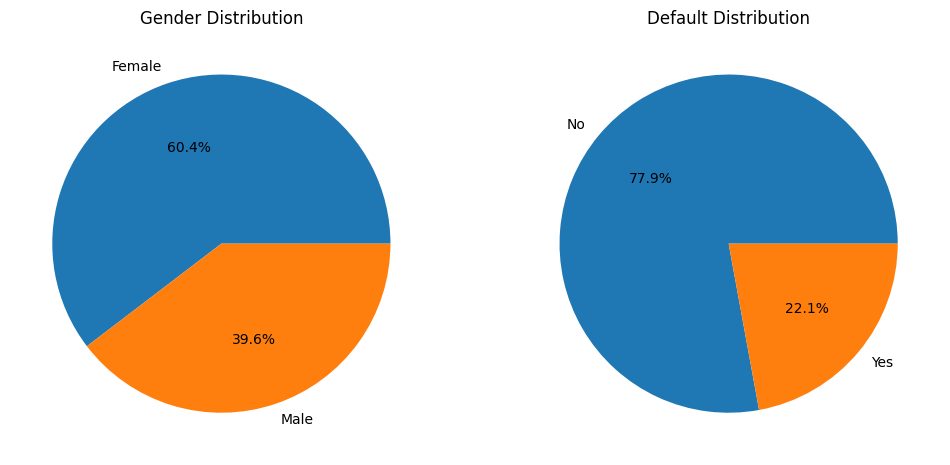

In [87]:
figs, axes = plt.subplots(1, 2, figsize=(12, 10))

gender_default = pd.crosstab(columns = data['default'], index = data['SEX'])

axes[0].pie(data['SEX'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%')
axes[0].set_title('Gender Distribution')


axes[1].pie(data['default'].value_counts(), labels=["No", "Yes"], autopct='%1.1f%%')
axes[1].set_title('Default Distribution')




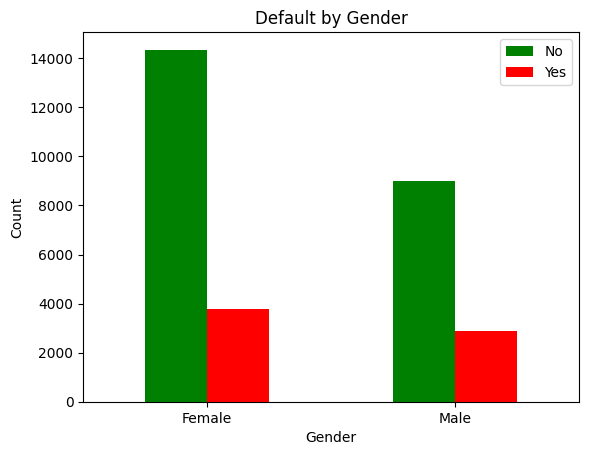

In [88]:
gender_default = pd.crosstab(columns = data['default'], index = data['SEX'])

ax_ = gender_default.plot.bar(rot=0, color=['green', 'red'])
ax_.set_title('Default by Gender')
ax_.set_xlabel("Gender")
ax_.set_ylabel("Count")
ax_.set_xticklabels(['Female', 'Male'])
ax_.legend(['No', 'Yes'])
plt.show()

In [89]:
limit_default = pd.crosstab(columns = data['default'], index = data['LIMIT_BAL'])


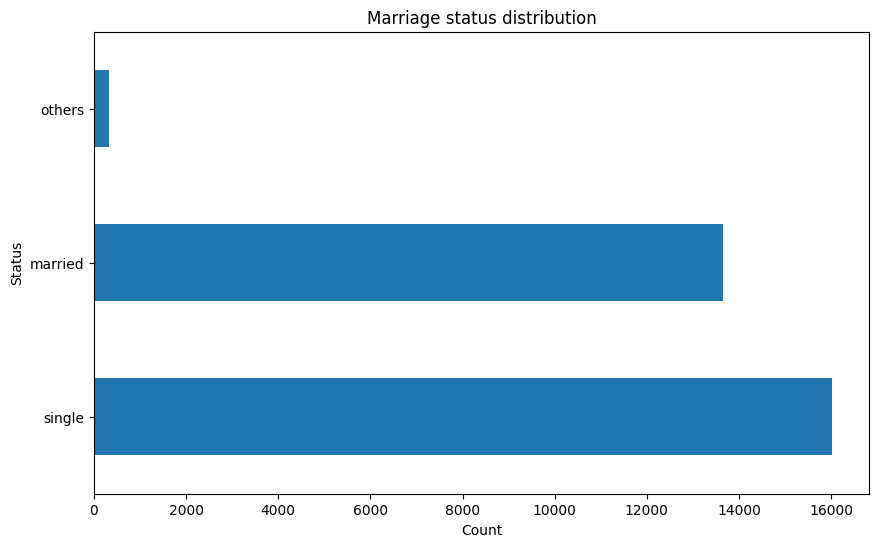

In [90]:
plt.figure(figsize=(10,6))
data['MARRIAGE'].value_counts().plot(kind='barh')
plt.title('Marriage status distribution')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

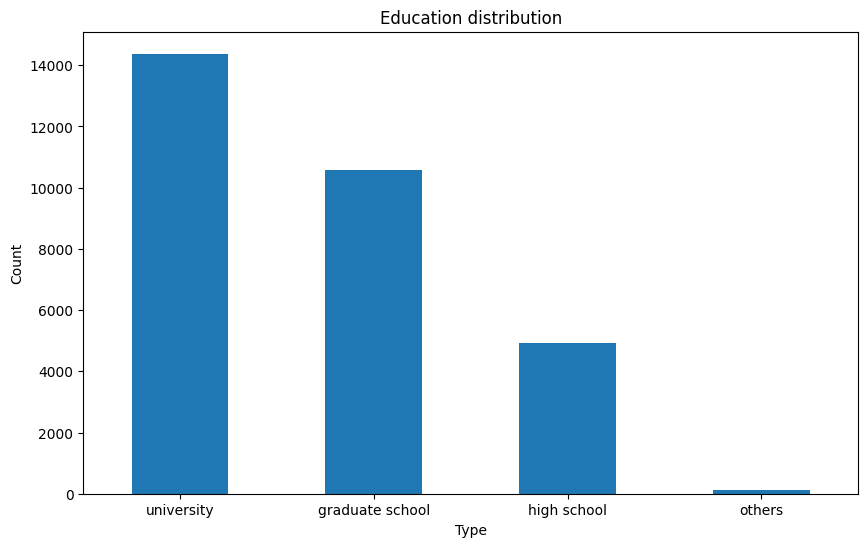

In [91]:
plt.figure(figsize=(10,6))
data['EDUCATION'].value_counts().plot(kind='bar', rot=0)
plt.title('Education distribution')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

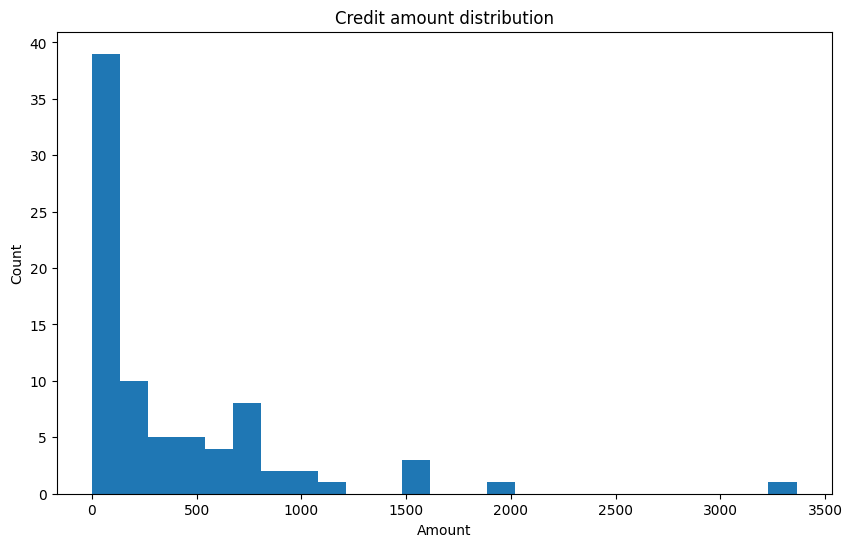

In [92]:
plt.figure(figsize=(10,6))
data['LIMIT_BAL'].value_counts().plot(kind='hist', rot=0, bins = 25)
plt.title('Credit amount distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

Splitting


In [93]:
data_dummies = pd.get_dummies(data, columns=["MARRIAGE", "EDUCATION"]).copy()

In [94]:
X = data_dummies.drop(["default"], axis=1)
y = data_dummies["default"]

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True, stratify=y)

Modeling

In [96]:
from category_encoders import TargetEncoder

encoder = TargetEncoder(cols=delay_cols)

X_train = encoder.fit_transform(X_train, y_train)

X_test = encoder.transform(X_test)

In [97]:
X_train.head()

,LIMIT_BAL,SEX,AGE,months_delayed_september,months_delayed_august,months_delayed_july,months_delayed_june,months_delayed_may,months_delayed_april,money_owed_september,money_owed_august,money_owed_july,money_owed_june,money_owed_may,money_owed_april,money_paid_september,money_paid_august,money_paid_july,money_paid_june,money_paid_may,money_paid_april,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
22788,160000,0,33,0.693639,0.556121,0.578125,0.526357,0.188791,0.189499,161771,172632,168541,164310,162681,163005,15000,0,0,6100,12300,6100,False,False,True,False,False,False,True
29006,150000,0,34,0.343667,0.159752,0.155504,0.185792,0.191582,0.197362,0,53,0,0,0,0,53,0,0,0,0,0,False,False,True,True,False,False,False
16950,10000,1,50,0.343667,0.556121,0.175689,0.184598,0.188791,0.189499,10171,8150,8446,8067,8227,8400,2,1281,1134,294,305,1000,True,False,False,False,False,False,True
22280,220000,0,29,0.128003,0.159548,0.175689,0.184598,0.188791,0.189499,206879,211037,215139,218513,131660,134346,9100,9000,7887,4800,4900,6000,False,False,True,True,False,False,False
11346,310000,0,32,0.343667,0.179538,0.155504,0.184598,0.188791,0.197362,0,0,326,326,-235,-235,0,326,0,0,0,1200,False,False,True,True,False,False,False


In [98]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [99]:
y_pred = rf_classifier.predict(X_test)

In [100]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.81
Precision: 0.64
Recall: 0.37
F1 Score: 0.47


In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4673
           1       0.64      0.37      0.47      1327

    accuracy                           0.81      6000
   macro avg       0.74      0.65      0.68      6000
weighted avg       0.79      0.81      0.79      6000



<Axes: >

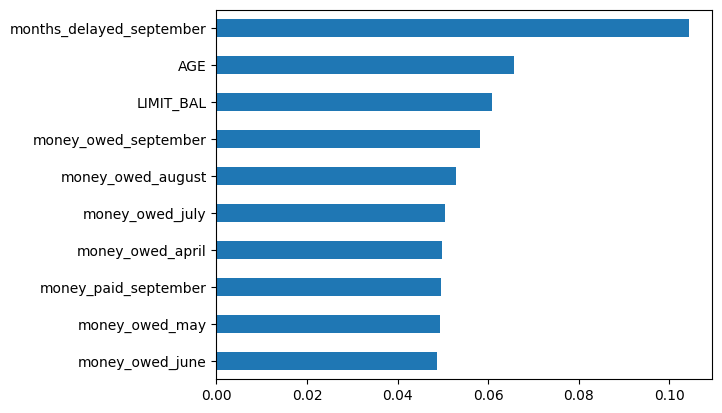

In [102]:
importances = rf_classifier.feature_importances_
weights = pd.Series(importances,
                 index=X.columns.values)

weights.sort_values()[-10:].plot(kind = 'barh')

In [103]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_smote, y_train_smote)

y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.81
Precision: 0.62
Recall: 0.42
F1 Score: 0.50


Scaling and Logistic Regression

In [104]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'AGE', 'months_delayed_september',
       'months_delayed_august', 'months_delayed_july', 'months_delayed_june',
       'months_delayed_may', 'months_delayed_april', 'money_owed_september',
       'money_owed_august', 'money_owed_july', 'money_owed_june',
       'money_owed_may', 'money_owed_april', 'money_paid_september',
       'money_paid_august', 'money_paid_july', 'money_paid_june',
       'money_paid_may', 'money_paid_april', 'MARRIAGE_married',
       'MARRIAGE_others', 'MARRIAGE_single', 'EDUCATION_graduate school',
       'EDUCATION_high school', 'EDUCATION_others', 'EDUCATION_university'],
      dtype='object')

In [105]:
columns_to_scale = ['months_delayed_september',
       'months_delayed_august', 'months_delayed_july', 'months_delayed_june',
       'months_delayed_may', 'months_delayed_april', 'money_owed_september',
       'money_owed_august', 'money_owed_july', 'money_owed_june',
       'money_owed_may', 'money_owed_april', 'money_paid_september',
       'money_paid_august', 'money_paid_july', 'money_paid_june',
       'money_paid_may', 'money_paid_april']

columns_no_scale = [col for col in X_train.columns if col not in columns_to_scale]

preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale),
        ('no_scaler', 'passthrough', columns_no_scale)
    ]
)

In [106]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [107]:
X_train = pd.DataFrame(X_train, columns=columns_to_scale + columns_no_scale)
X_test = pd.DataFrame(X_test, columns=columns_to_scale + columns_no_scale)

In [108]:
X_train.head()

,months_delayed_september,months_delayed_august,months_delayed_july,months_delayed_june,months_delayed_may,months_delayed_april,money_owed_september,money_owed_august,money_owed_july,money_owed_june,money_owed_may,money_owed_april,money_paid_september,money_paid_august,money_paid_july,money_paid_june,money_paid_may,money_paid_april,LIMIT_BAL,SEX,AGE,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university
0,2.689926,2.382068,2.942161,2.649069,-0.291137,-0.305944,1.505547,1.745089,1.778869,1.891679,2.020839,2.096346,0.580657,-0.290332,-0.29782,0.086961,0.500397,0.048745,160000,0,33,False,False,True,False,False,False,True
1,0.699353,-0.43339,-0.535449,-0.304619,-0.265771,-0.22873,-0.695165,-0.691138,-0.68509,-0.673845,-0.662488,-0.652126,-0.344969,-0.290332,-0.29782,-0.318075,-0.316978,-0.292992,150000,0,34,False,False,True,True,False,False,False
2,0.699353,2.382068,-0.369356,-0.314978,-0.291137,-0.305944,-0.5568,-0.576836,-0.561615,-0.547887,-0.526789,-0.510492,-0.348128,-0.227081,-0.233069,-0.298554,-0.29671,-0.23697,10000,1,50,True,False,False,False,False,False,True
3,-0.527301,-0.43484,-0.369356,-0.314978,-0.291137,-0.305944,2.11919,2.287237,2.460102,2.738001,1.509166,1.613118,0.215287,0.154056,0.152526,0.000642,0.008643,0.043143,220000,0,29,False,False,True,True,False,False,False
4,0.699353,-0.29285,-0.535449,-0.314978,-0.291137,-0.22873,-0.695165,-0.691886,-0.680324,-0.668755,-0.666365,-0.656089,-0.348251,-0.274236,-0.29782,-0.318075,-0.316978,-0.225765,310000,0,32,False,False,True,True,False,False,False


In [109]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=5000)
log_model.fit(X_train, y_train)
log_predictions = log_model.predict(X_test)


In [110]:
accuracy_logistic = accuracy_score(y_test, log_predictions)
print(round(accuracy_logistic, 2))

0.82


In [111]:
print(classification_report(y_test, log_predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4673
           1       0.66      0.35      0.46      1327

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



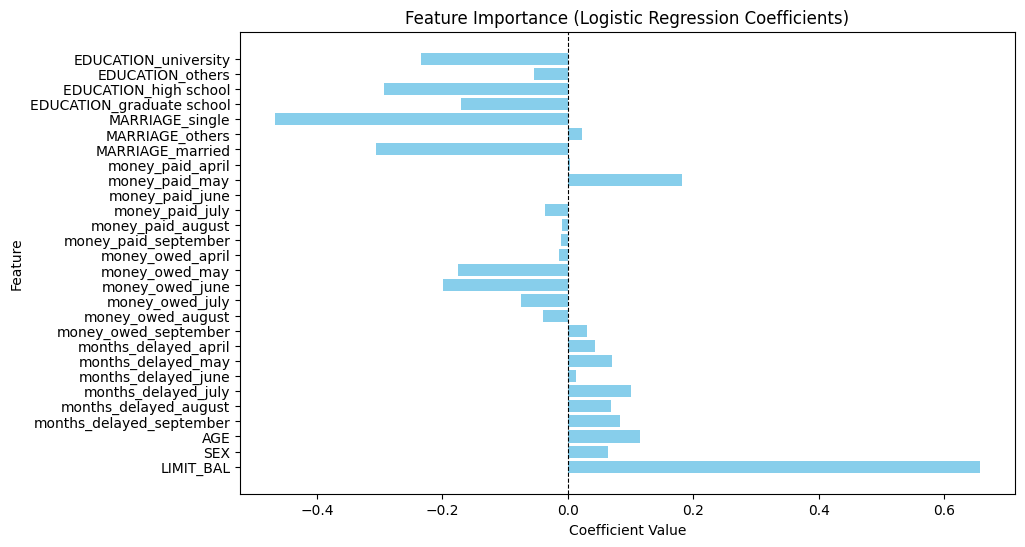

In [112]:
coefficients = log_model.coef_[0]
features = X.columns


plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='skyblue')
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.axvline(0, color='black', linestyle='--', linewidth=0.8)
plt.show()

Decision Tree


In [113]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

dec_tree_pred = dec_tree.predict(X_test)

In [114]:
accuracy_tree = accuracy_score(y_test, dec_tree_pred)
accuracy_tree

0.7155

In [115]:
print(classification_report(y_test, dec_tree_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82      4673
           1       0.37      0.40      0.38      1327

    accuracy                           0.72      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.72      0.72      0.72      6000



In [116]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train_smote, y_train_smote)

dec_tree_pred = dec_tree.predict(X_test)
accuracy = accuracy_score(y_test, dec_tree_pred)
precision = precision_score(y_test, dec_tree_pred, average='binary')
recall = recall_score(y_test, dec_tree_pred, average='binary')
f1 = f1_score(y_test, dec_tree_pred, average='binary')


print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.71
Precision: 0.37
Recall: 0.42
F1 Score: 0.39


In this project, I analyzed a dataset containing information about whether a client had a default payment, along with various features that could assist in predicting it. The primary objective was to predict whether a client would default on their payment in the following month.  

I trained three different machine learning models: a Random Forest model, a Logistic Regression model, and a Decision Tree Classifier. The random forest and logistic regression models performed best, achieving similar prediction metrics like accuracy, precision, recall, and F1 score. (0.81, 0.64, 0.37, 0.47 vs. 0.82, 0.66, 0.35, 0.46, resprectively). The decision tree model performed worse, achieving scores of 0.71, 0.37, 0.40, 0.38 for accuracy, precision, recall, and F1 score, respectively.

Data Transformations

In [ ]:
'''from sklearn.preprocessing import PowerTransformer

columns_to_transform = data.columns[11:-1]

pt = PowerTransformer(method='yeo-johnson')
transformed_values = pt.fit_transform(data[columns_to_transform])
transformed_data = data.copy()
transformed_data[columns_to_transform] = transformed_values
print("Lambda:", pt.lambdas_)'''